In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify  # For treemap

In [3]:
data = pd.read_csv('cluster_kmeans.csv')

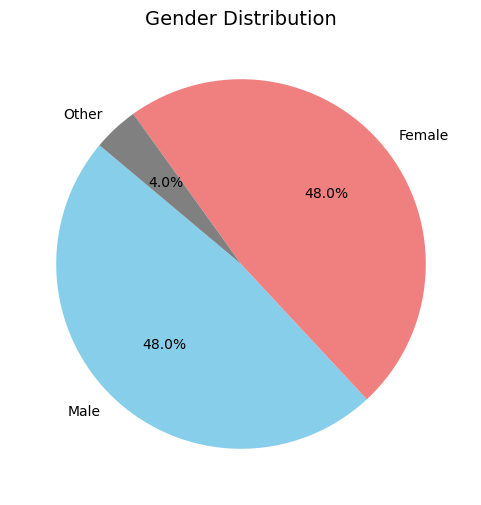

In [5]:
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'gray'])
plt.title('Gender Distribution', fontsize=14)
plt.show()

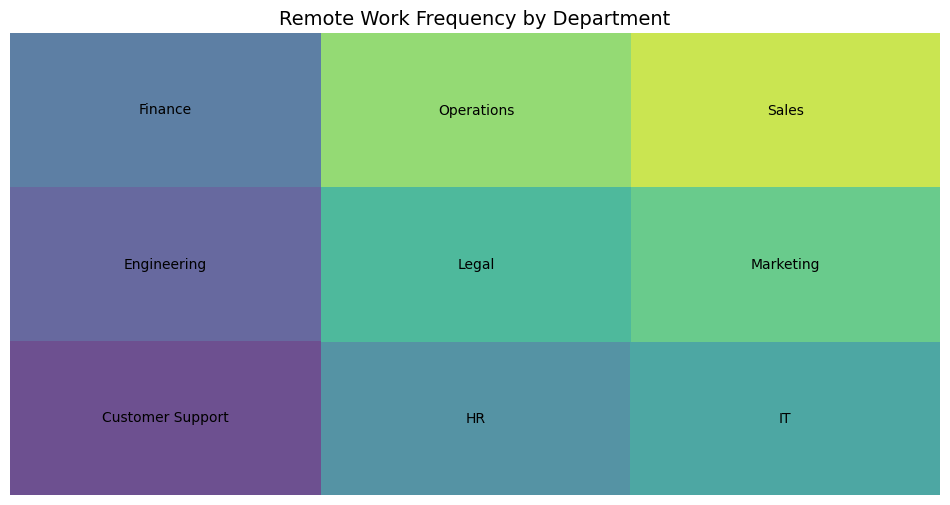

In [6]:
remote_work_dept = data.groupby('Department')['Remote_Work_Frequency'].mean()

# Prepare data for treemap
treemap_data = pd.DataFrame({'Department': remote_work_dept.index, 'Frequency': remote_work_dept.values})
plt.figure(figsize=(12, 6))
squarify.plot(sizes=treemap_data['Frequency'], label=treemap_data['Department'], alpha=0.8, color=sns.color_palette('viridis', len(treemap_data)))
plt.title('Remote Work Frequency by Department', fontsize=14)
plt.axis('off')
plt.show()

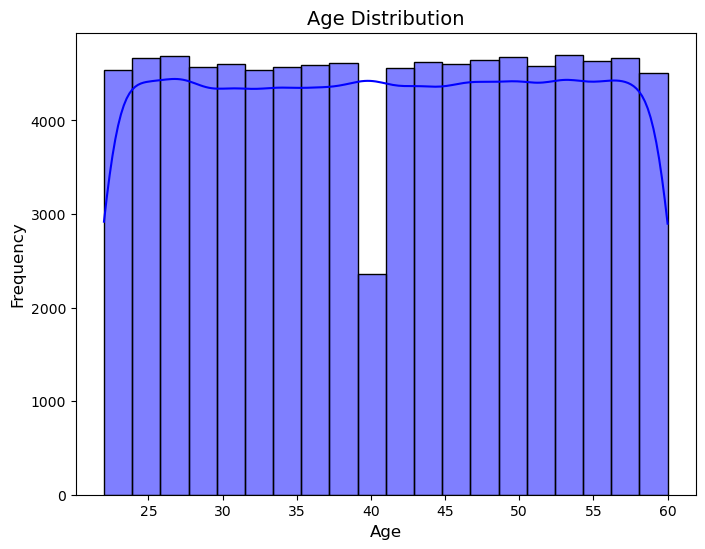

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

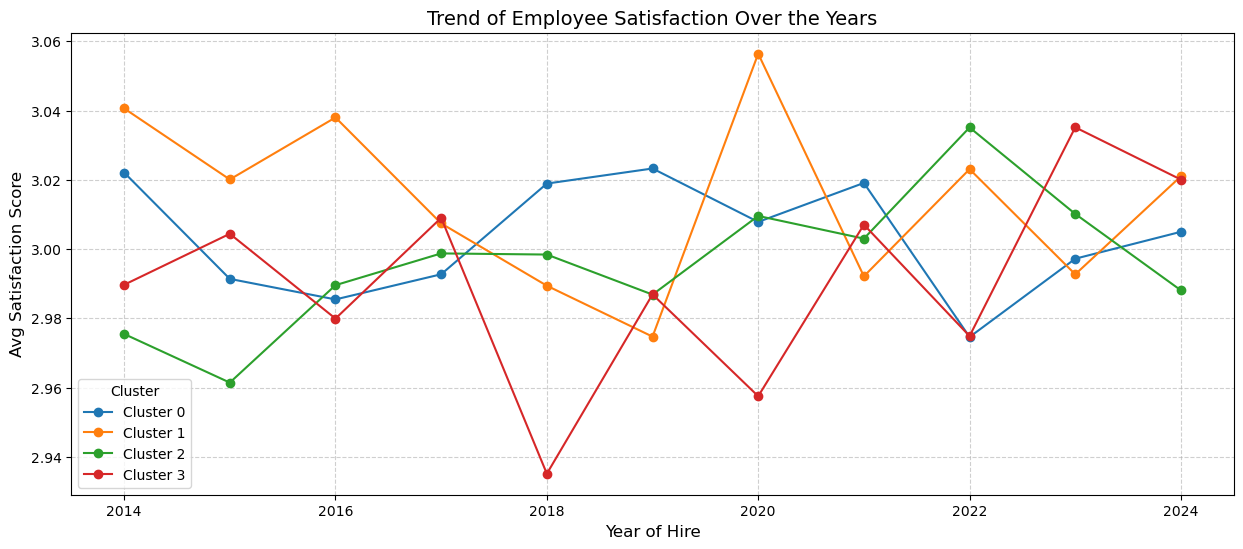

In [15]:
data['Hire_Year'] = pd.to_datetime(data['Hire_Date'], errors='coerce').dt.year

# 1. Trend Line: Employee Satisfaction Over the Year
trend_data = data.groupby(['Hire_Year', 'cluster'])['Employee_Satisfaction_Score'].mean().reset_index()

# Convert clusters to strings for compatibility with older versions
trend_data['cluster'] = trend_data['cluster'].astype(str)

# Create trend line using matplotlib
plt.figure(figsize=(15, 6))
for cluster in trend_data['cluster'].unique():
    cluster_data = trend_data[trend_data['cluster'] == cluster]
    plt.plot(
        cluster_data['Hire_Year'],
        cluster_data['Employee_Satisfaction_Score'],
        marker='o',
        label=f'Cluster {cluster}'
    )

plt.title('Trend of Employee Satisfaction Over the Years', fontsize=14)
plt.xlabel('Year of Hire', fontsize=12)
plt.ylabel('Avg Satisfaction Score', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

C:\Users\daru1\AppData\Local\Temp\ipykernel_11816\3025223171.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




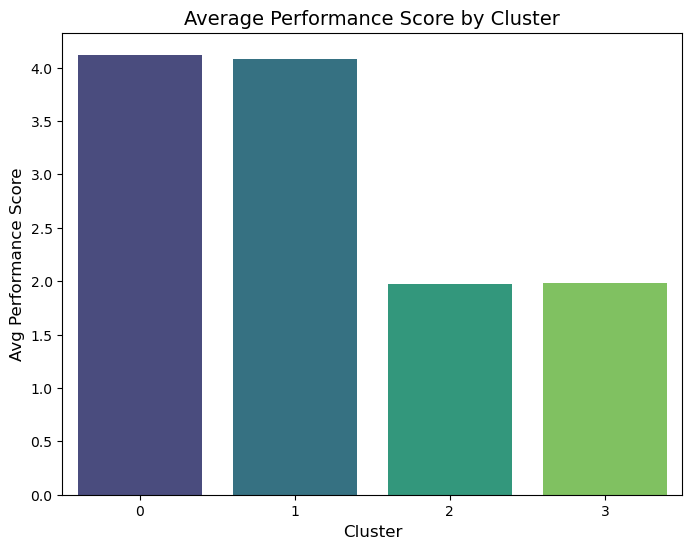

In [17]:
performance_data = data.groupby('cluster')['Performance_Score'].mean().reset_index()

# Create bar plot using matplotlib
plt.figure(figsize=(8, 6))
sns.barplot(data=performance_data, x='cluster', y='Performance_Score', palette='viridis')
plt.title('Average Performance Score by Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Avg Performance Score', fontsize=12)
plt.show()


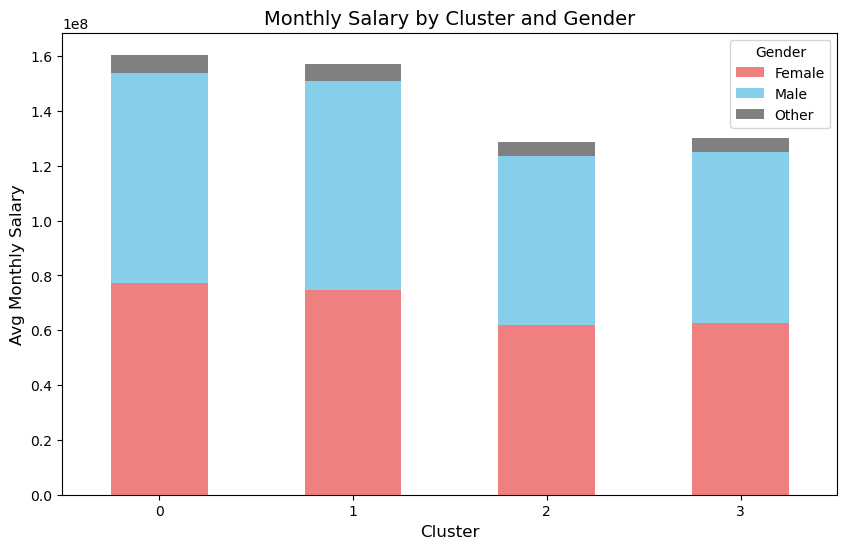

In [22]:
salary_gender_data = data.groupby(['cluster', 'Gender'])['Monthly_Salary'].sum().unstack()

# Create stacked bar chart using matplotlib
salary_gender_data.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['lightcoral','skyblue',  'gray']
)
plt.title('Monthly Salary by Cluster and Gender', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Avg Monthly Salary', fontsize=12)
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.show()


C:\Users\daru1\AppData\Local\Temp\ipykernel_11816\1290068314.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\daru1\AppData\Local\Temp\ipykernel_11816\1290068314.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\daru1\AppData\Local\Temp\ipykernel_11816\1290068314.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\daru1\AppData\Local\Temp\ipykernel_11816\1290068314.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same ef

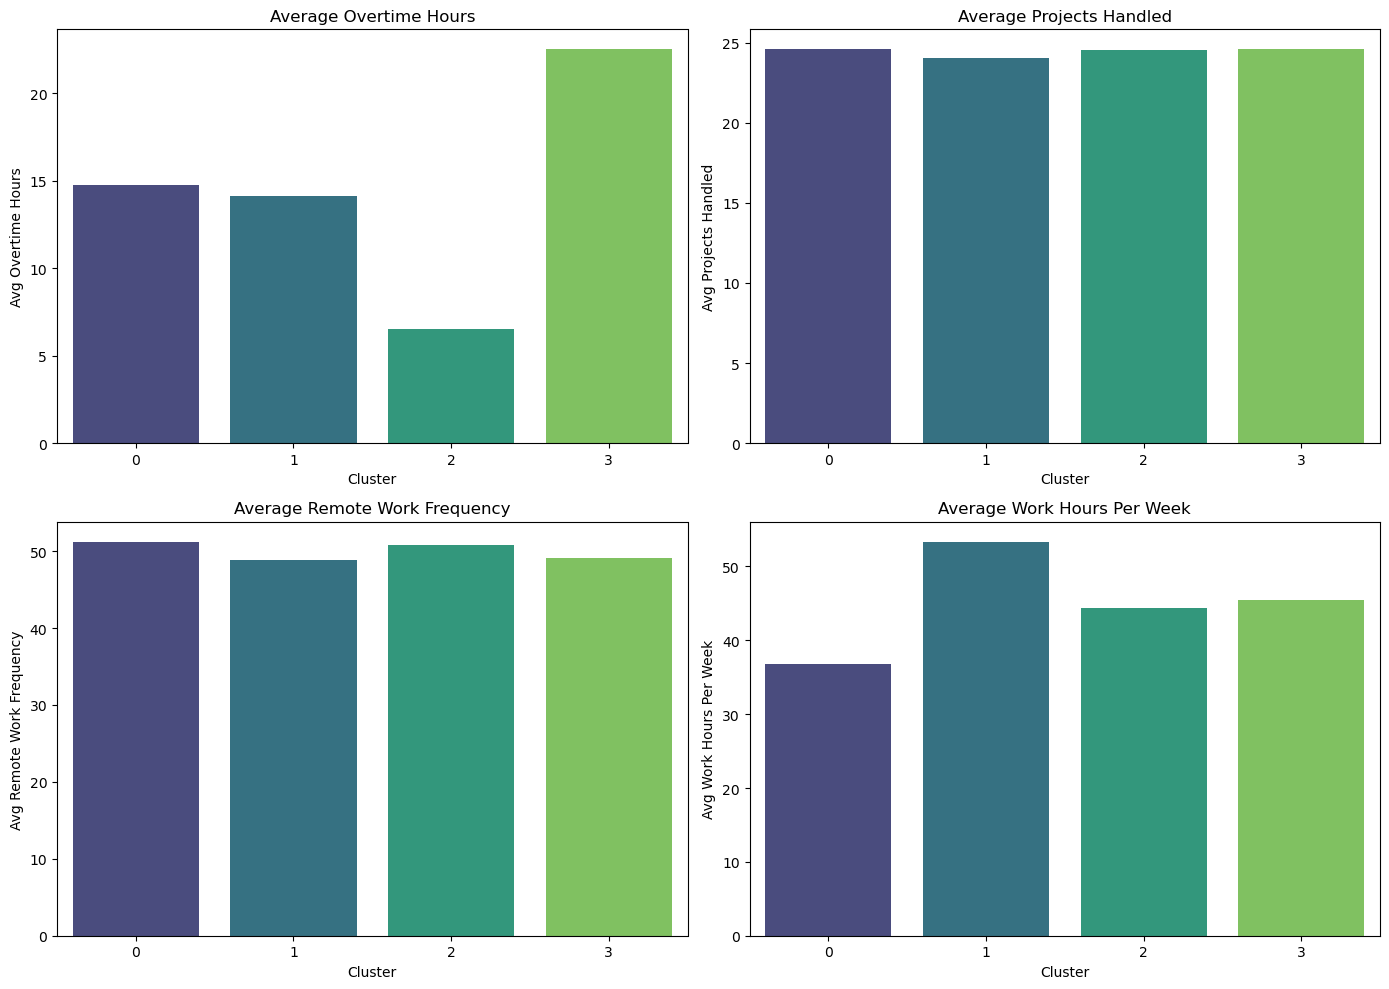

In [23]:
metrics = ['Overtime_Hours', 'Projects_Handled', 'Remote_Work_Frequency', 'Work_Hours_Per_Week']
clustered_metrics = data.groupby('cluster')[metrics].mean().reset_index()

# Create subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.barplot(data=clustered_metrics, x='cluster', y=metric, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Average {metric.replace("_", " ")}', fontsize=12)
    axes[i].set_xlabel('Cluster', fontsize=10)
    axes[i].set_ylabel(f'Avg {metric.replace("_", " ")}', fontsize=10)

plt.tight_layout()
plt.show()